# Problems

## 4)
<br>

## 7)
>In order to minimize the squared error when finding K clusters, the second option should appear. With the application of this option, more centroids should be in the less dense region and less centroids in the more dense regions. By having places where points are far apart, the larger number of centroids would decrease the distance from the centroids to the points and as a result, give more accurate calculations. The opposite would go for more dense regions, and as a result, giving more accurate calculations than with a large distance.

## 11)
>If the SSE of a variable is low for all the clusters, then the variable would be treated as a constant and as a result wouldn't help in seperating data into groups. If the value were high for all the clusters, the variable would more than likely just be noise compared to the rest of the data. If the value were low one cluster then it would define the cluster itself. If it were high for one cluster it most likely wouldn't be giving much information.
<br>You can use per variable SSE information to improve your clustering by getting rid of variables that do not do a good job of differentiating the clusters. If there are low or high SSE values that exist as outliers, they can be eliminated as they either are just noise or don't give any info.

## 16)

## 17)
>1) First cluster is 6, 12, 18, 24, 30 and second cluster is 42, 48. The error for the first is (12<sup>2</sup> + 6<sup>2</sup> + 0<sup>2</sup> + 6<sup>2</sup> + 12<sup>2</sup>) = 360 and for the second is (3<sup>2</sup> + 3<sup>2</sup>) = 18. Total error = 360 + 18 = 378
<br>2) First cluster is 6, 12, 18, 24 and the second cluster is 30, 42, 48. The error for the first is (9<sup>2</sup> + 3<sup>2</sup> + 3<sup>2</sup> + 9<sup>2</sup>) = 180 and the second is (10<sup>2</sup> + 2<sup>2</sup> + 8<sup>2</sup>) = 168. Total error = 180 + 168 =348
<br>3) Both sets of sentrods are stable solutions, so no there would be no change. 
<br>4) The clusters would be: 6, 12, 18, 24, 30 and the other 42, 48.
<br>5) Single link seems to produce the most "natural" clustering.
<br>6)

## 21)
><br>Entropy(Cluster 1): (1/693)log<sub>2</sub>(1/693) - (1/693)log<sub>2</sub>(1/693) - (11/693)log<sub>2</sub>(11/693) - (4/693)log<sub>2</sub>(4/693) - (676/693)log<sub>2</sub>(676/693) = 0.2
<br>Entropy(Cluster 2): (27/1562)log<sub>2</sub>(27/1562) - (89/1562)log<sub>2</sub>(89/1562) - (333/1562)log<sub>2</sub>(333/1562) - (872/1562)log<sub>2</sub>(872/1562) - (253/1562)log<sub>2</sub>(253/1562) - (33/1562)log<sub>2</sub>(33/1562) = 1.84
<br>Entropy(Cluster 3): (326/949)log<sub>2</sub>(326/949) - (465/949)log<sub>2</sub>(465/949) - (8/949)log<sub>2</sub>(8/949) - (105/949)log<sub>2</sub>(105/949) - (16/949)log<sub>2</sub>(16/949) - (29/949)log<sub>2</sub>(29/949) = 1.696
<br>Purity(Cluster 1): 676/693 = 0.975
<br>Purity(Cluster 2): 827/1562 = 0.529
<br>Purity(Cluster 3): 465/949 = 0.49
<table>
  <tr>
    <th>Cluster</th>
    <th>Entropy</th>
    <th>Purity</th>
  </tr><tr>
    <td>1</td>
    <td>0.2</td>
    <td>0.98</td>
  </tr><tr>
    <td>2</td>
    <td>1.84</td>
    <td>0.53</td>
  </tr><tr>
    <td>3</td>
    <td>1.7</td>
    <td>0.49</td>
</table>


## 22)
><br>a) Yes there is a difference. The uniformly spaced points will have uniform density throughout the unit square, whereas the points generated from a uniform distribution are random so they would have places with higher or lower density.
<br>b) The random set will typically have a lower SSE.
<br>c) DBSCAN would do one of two things for the uniform data set: merge the points into one cluster or classify them as noise. But for the more random data, DBSCAN could potentially find clusters since there would be some variation in the density.


# Practicum

## 2.1

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

#Names Attributes
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
all_df = pd.read_csv("./Data_Sets/auto-mpg.data", delim_whitespace=True, names=column_names)
auto_df = all_df[['mpg','displacement','horsepower','weight','acceleration']]

#Finds missing HP's and replaces with numpy NaN
missing_hp = auto_df[auto_df.horsepower == '?'].index
auto_df.loc[missing_hp]
auto_df.loc[missing_hp, 'horsepower'] = np.nan
auto_df.horsepower  = auto_df.horsepower.apply(pd.to_numeric)

mean_imputer =   SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Impute with mean and print summary
imputed_mean_df = auto_df.copy()
imputed_mean_df['horsepower'] = (mean_imputer.fit_transform(auto_df[['horsepower']])).ravel()


print("\n----Mean Replaced Summary Statistics----\n")
print(imputed_mean_df.describe())
print("\nMean Replaced Variance: " + str(imputed_mean_df.loc[:,'horsepower'].var()))


----Mean Replaced Summary Statistics----

              mpg  displacement  horsepower       weight  acceleration
count  398.000000    398.000000  398.000000   398.000000    398.000000
mean    23.514573    193.425879  104.469388  2970.424623     15.568090
std      7.815984    104.269838   38.199187   846.841774      2.757689
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.500000    104.250000   76.000000  2223.750000     13.825000
50%     23.000000    148.500000   95.000000  2803.500000     15.500000
75%     29.000000    262.000000  125.000000  3608.000000     17.175000
max     46.600000    455.000000  230.000000  5140.000000     24.800000

Mean Replaced Variance: 1459.177916002673


In [18]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average',n_clusters=3,)
X = imputed_mean_df.values
y = imputed_mean_df.columns.values
clusters = clustering.fit(X)
labels = clustering.labels_
clusters

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [19]:
print("Number of clusters: " + str(clusters.n_clusters_))
X

Number of clusters: 3


array([[  18. ,  307. ,  130. , 3504. ,   12. ],
       [  15. ,  350. ,  165. , 3693. ,   11.5],
       [  18. ,  318. ,  150. , 3436. ,   11. ],
       ...,
       [  32. ,  135. ,   84. , 2295. ,   11.6],
       [  28. ,  120. ,   79. , 2625. ,   18.6],
       [  31. ,  119. ,   82. , 2720. ,   19.4]])

In [20]:
c1 = X[labels==0]
c1_means = np.mean(c1,axis=0)
c1_means

array([  27.36541353,  131.93421053,   84.30006138, 2459.5112782 ,
         16.2981203 ])

In [37]:
cluster_1 = X[labels==0]
cluster_2 = X[labels==1]
cluster_3 = X[labels==2]
#print("Cluster 1 Size: " +str(len(cluster_1)))
#print("Cluster 2 Size: " +str(len(cluster_2)))
#print("Cluster 3 Size: " +str(len(cluster_3)))
#print("Sum: " + str(len(cluster_1)+len(cluster_2)+len(cluster_3)))
c1_means = list(cluster_1.mean(axis=0))
c1_means.insert(0,1) # Add cluster number to front
c2_means = list(cluster_2.mean(axis=0))
c2_means.insert(0,2) # Add cluster number to front
c3_means = list(cluster_3.mean(axis=0))
c3_means.insert(0,3) # Add cluster number to front

mean_df = pd.DataFrame([c1_means,c2_means,c3_means],columns =['cluster','mpg','displacement','horsepower','weight','acceleration'])
#mean_df.concat([c2_means])
print("Means of Clusters:")
print(mean_df.to_string(index=False))


Means of Clusters:
 cluster        mpg  displacement  horsepower       weight  acceleration
       1  27.365414    131.934211   84.300061  2459.511278     16.298120
       2  13.889062    358.093750  167.046875  4398.593750     13.025000
       3  17.510294    278.985294  124.470588  3624.838235     15.105882


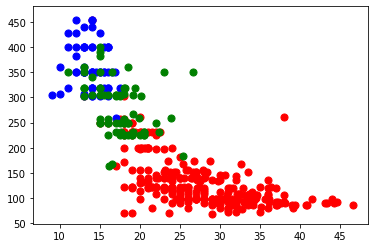

In [21]:
from matplotlib import pyplot as plt

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [39]:
c1_vars = list(cluster_1.var(axis=0))
c1_vars.insert(0,1) # Add cluster number to front
c2_vars = list(cluster_2.var(axis=0))
c2_vars.insert(0,2) # Add cluster number to front
c3_vars = list(cluster_3.var(axis=0))
c3_vars.insert(0,3) # Add cluster number to front

variance_df = pd.DataFrame([c1_vars,c2_vars,c3_vars],columns =['cluster','mpg','displacement','horsepower','weight','acceleration'])
#mean_df.concat([c2_means])
print("Variances of Clusters:")
print(variance_df.to_string(index=False))

Variances of Clusters:
 cluster        mpg  displacement  horsepower         weight  acceleration
       1  41.818503   2817.451499  367.755734  181945.513031      5.696801
       2   3.306599   2104.803711  744.700928   73151.209961      3.535313
       3   8.700041   2840.102725  702.602076   37220.282656     10.401730


In [7]:
## 2.2

In [8]:
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd

boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_scaled = pd.DataFrame(data=preprocessing.scale(boston.data), columns=boston.feature_names)

In [9]:
model = KMeans(n_clusters=2, init='k-means++')
labels = model.fit_predict(df_scaled)
silhouette = metrics.silhouette_score(df_scaled, labels)
print(labels)
print(silhouette)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
model = KMeans(n_clusters=3, init='k-means++')
labels = model.fit_predict(df_scaled)
silhouette = metrics.silhouette_score(df_scaled, labels)
print(labels)
print(silhouette)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 0 0 0 0 0 0 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [11]:
model = KMeans(n_clusters=4, init='k-means++')
labels = model.fit_predict(df_scaled)
silhouette = metrics.silhouette_score(df_scaled, labels)
print(labels)
print(silhouette)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 3 2 3 3 2 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 3 3 3 3 0 0 0 3 0 3 3 3 3
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 1 0 3 3 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 2 3 3 2 2 2 2 3
 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [12]:
model = KMeans(n_clusters=5, init='k-means++')
labels = model.fit_predict(df_scaled)
silhouette = metrics.silhouette_score(df_scaled, labels)
print(labels)
print(silhouette)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 3 2 3 3 4 0 0 2 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 3 3 3 3 0 0 0 3 0 3 3 3 3
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 2 3 3 2 2 4 2 3
 3 2 3 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2
 2 2 4 4 4 4 4 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2
 2 4 2 2 2 2 4 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [13]:
model = KMeans(n_clusters=6, init='k-means++')
labels = model.fit_predict(df_scaled)
silhouette = metrics.silhouette_score(df_scaled, labels)
print(labels)
print(silhouette)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 3 2 3 3 2 2 2 2 3 2 3 3 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 3 3 3 3 3 0 0 0 3 0 3 3 3 3
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 4 4 4 0 4 4 0 0 4 0 4 4 4 4 4 4 4 4 4 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 4 3 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 0 0 0
 0 0 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 0 0 0 0 0 0 0 0 4 0 4 4 0 0 4 4 4 4 4 4 4 4 4 3 3 3 1 1 1 1 3 3 1 1 5 1 3
 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 5 5 5 5 5 5 5 5 5 5 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1
 1 5 1 1 1 1 5 1 1 1 5 5 5 5 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 

In [14]:
df.mean(axis = 0)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

According to the data I recorded, the Silhouette score for clusters = 2 has the highest number meaning that it is the best clustering overall. Using this data the second best clustering method would be 5 and the worst would be 3.

## 2.3

In [15]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_scaled = pd.DataFrame(data=preprocessing.scale(wine.data), columns=wine.feature_names)
model = KMeans(n_clusters=3, init='k-means++')
labels = model.fit_predict(df_scaled)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
